# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**: Gianna Weidman

**ID**: grw64

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Local/Coding Projects/BEE4570/hw2-me-myself-and-i`


In [2]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
<img src="figures/river_diagram.png"
alt="Schematic of the river system in Problem 1" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 $m^3$).

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.


**My Solution**

To start, define some different control volumes.
1. At the place where the River meets Discharge #1
2. The River section between the two Discharge points
3. Where the River meets Discharge #2

Assume that the discharge points are points, aka there's no decay due to distance/time within the discharge point.

The code written essentially is just the math of the problem. The comments explain which operations and calculations are being done.

Variables include $Q$, which represent flows in m3/day, $C$ which represents CRUD concentrations in kg/1000m3. $\alpha$ is the decay rate of 0.36/day.

The differential equations for each control volume are formulated:
$\frac{dQC}{dt} = \sum Q_{in}C_{in} - \sum Q_{out}C-\alpha C=0$
With the change in mass set to equal zero due to steady-state assumption. The solution to the equations is a series of mass balances, where $Q_{out} = \sum Q_{in}$, and $C_{out} = \frac{\sum (Q_{in}C_{in})}{\sum Q_{in}}$

The system does seem to be in compliance with the regulatory limit. The concentration of CRUD right after passing the 2nd discharge point is 2.007 kg/1000 $m^3$. Because of the way CRUD decays over time, this concentration will only decrease. Therefore, the river downstream will remain in regulatory compliance.

In [2]:
# Given information
Qr = 250000     # River flow rate (m3/day)
Cr = 0.5        # CRUD (/1000m3)

Q1 = 40000      # Discharge 1 flow (m3/day)
C1 = 9          # CRUD (/1000m3)

# Mass balance on the first control volume
Qr2 = Qr + Q1
Cr2 = (Qr*Cr + Q1*C1)/Qr2   # CRUD (/1000m3)

# Convert decay rate to vary as a function of distance using river flow rate given (10 km/d)
dr = 0.36 * 1/10     # decay rate: /km

# Exponential decay function
function decay(C0, d)
    """
    C0: intial CRUD concentration
    d:  the distance traveled
    """

    return C0 * exp(-dr * d)

end

# CRUD concentration change by end of 2nd control volume
Cr3 = decay(Cr2, 15)

# Given information
Q2 = 60000      # Discharge 2 flow (m3/day)
C2 = 7          # CRUD (/1000m3)

# Mass balance on 3rd control volume
Qr4 = Qr2 + Q2
Cr4 = (Qr2*Cr3 + Q2*C2)/Qr4

# Cr4 is the concentration by the end of the 3rd control volume
@show Cr4

Cr4 = 2.0075225782896715


2.0075225782896715

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

**Solution to Problem 2**

Referred to lecture slides to set up code. 

Based on the plot, it seems that there are equillibria where $X_t >= 0.5$ at $X = 1$ usually reached by 40 time steps, except for when $X_0 = 0.5$ where it took much longer to reach that point. There's also an equilbrium point at $X=0$ where $X_0 < 0.5$. This is generally reached by 20 time steps. I would say the system seems pretty resilient, but the pace at which the system returns to a steady state depends largely on where it started initially.

Upon repeating the analysis with a point-source being considered, the system dynamics changed such that it no longer had three equilibria: for the range of initial P concentrations considered, they all eventualyl returned to an equilibrium concentration of 1.82 [units P conc]. In this model, the lake also reached its equilibrium much faster, within as few as 15 timesteps for all $X_0$. In addition, variations in the intial P concentrations does not change the final state of the system. This could be interpreted as the system being more resilient. 

In [4]:
# Code laying out the functions

recycling(x, q) = x.^q ./ (1 .+ x .^q)
outflow(x, b) = -1 .* b .* x

function P_simulation(X0, T, b, q, a, y)
    """
    X0: (float) initial P concentration in lake
    T:  (int)   number of timesteps to model
    b:  (float) linear rate of P flow
    q:  (float) parameter for P recycling
    q:  (array) point source releases
    y:  (array) non-point source releases
    """

    # make empty array for X based off time frame T
    X = zeros(T)
    
    # set initial X as given X0
    X[1] = X0

    # iterate through timesteps for change in X
    for t = 2:T
        X[t] = X[t-1] .+ a[t] .+ y[t] .+ recycling(X[t-1], q) .+ outflow(X[t-1], b)
    end

    return X
end

P_simulation (generic function with 1 method)

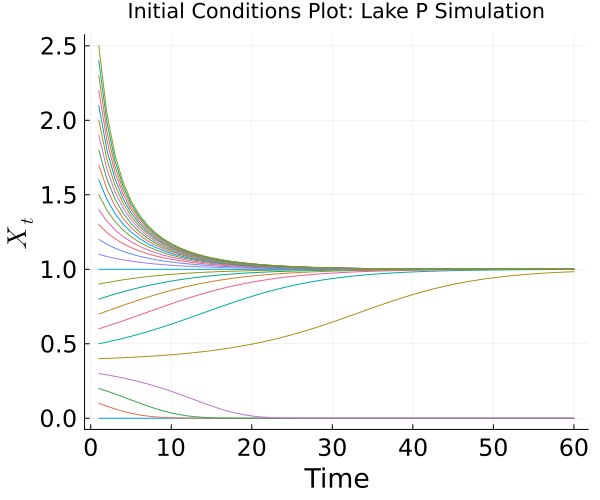

In [5]:
# Code displaying the first plot

using Plots

# Set parameters
T = 60
q = 1.5
b = 0.5
a = zeros(T)
y = zeros(T)
X_vals = collect(0:0.1:2.5)

X = map(x -> P_simulation(x, T, b, q, a, y), X_vals)

p_noinflow = plot(X, label=false, title="Initial Conditions Plot: Lake P Simulation", ylabel=L"X_t", xlabel="Time", guidefontsize=18, 
        tickfontsize=16, size=(600, 500))#, left_margin=5, bottom_margin=5)

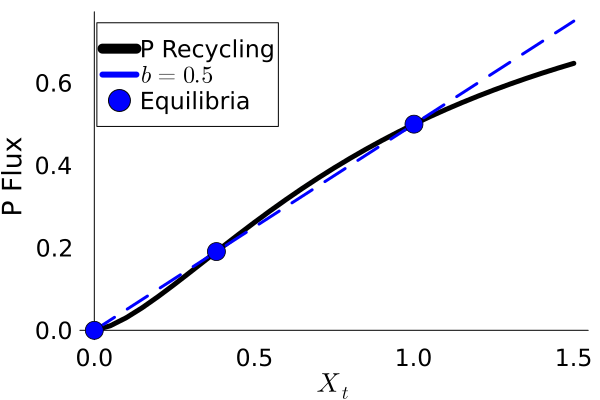

In [6]:
# Code for first dynamics plot 

# set Xt range
x = 0:0.05:1.5;

# Plot recycling and outflow curves
p1 = plot(x, recycling(x, q), color=:black, linewidth=5,legend=:topleft, label="P Recycling", ylabel="P Flux", xlabel=L"$X_t$", tickfontsize=16, guidefontsize=18, legendfontsize=16, palette=:tol_muted, framestyle=:zerolines, grid=:false)
plot!(x, -outflow(x, b), linewidth=3, linestyle=:dash, label=L"$b=0.5$", color=:blue)

# Eq1s found from below code and placed up here to appear on the plot
eq1 = [0.0, 0.382, 1.0]
scatter!(p1, eq1, (y -> recycling(y,q)).(eq1), label="Equilibria", markersize=10, markercolor=:blue)

In [7]:
# Code for finding equilibria
X_delta(x, a, q, b) = a .+ recycling(x, q) .+ outflow(x, b)

# First root
r1 = Roots.find_zero(x -> X_delta(x, a, q, b), 1.5)

# Second root
r2 = Roots.find_zero(x -> X_delta(x, a, q, b), 0.4)

# Third root
r3 = Roots.find_zero(x -> X_delta(x, a, q, b), 0.0)

print(r1, "\n", r2, "\n", r3)

1.0
0.3819660112501052
0.0

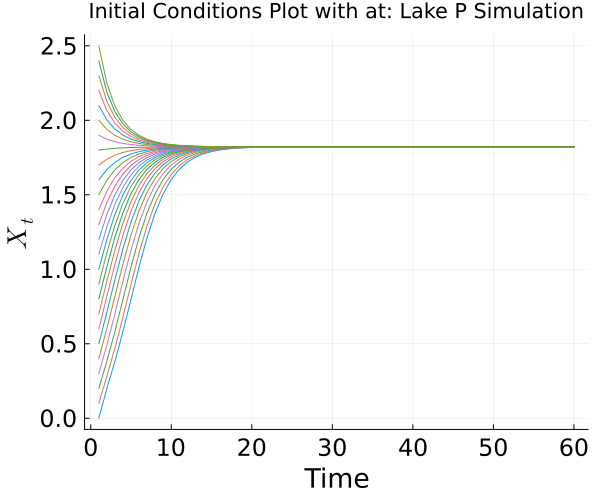

In [8]:
# Code changing at to 0.2 for all t
T = 60
a = zeros(T) .+ 0.2

X = map(x -> P_simulation(x, T, b, q, a, y), X_vals)

p_noinflow = plot(X, label=false, title="Initial Conditions Plot with at: Lake P Simulation", ylabel=L"X_t", xlabel="Time", guidefontsize=18, 
        tickfontsize=16, size=(600, 500))#, left_margin=5, bottom_margin=5)

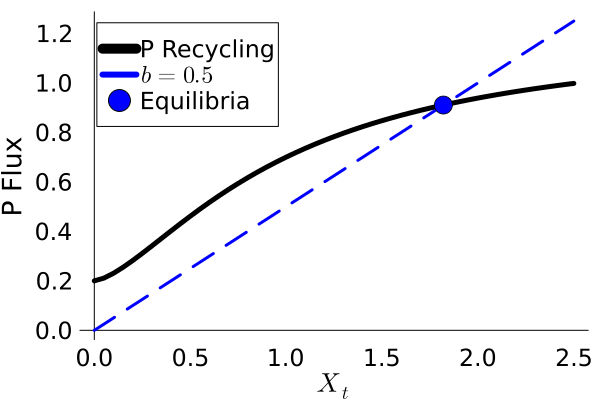

In [9]:
# New dynamics plot and Find new equilibrium

# define a function inflows (might be redundant now)
inflows(x,q,a) = a .+ recycling(x,q)

# set Xt range
x = 0:0.05:2.5;

# a of proper size
a2 = zeros(length(x)) .+ 0.2

# Plot recycling and outflow curves
p1 = plot(x, inflows(x, q, a2), color=:black, linewidth=5,legend=:topleft, label="P Recycling", ylabel="P Flux", xlabel=L"$X_t$", tickfontsize=16, guidefontsize=18, legendfontsize=16, palette=:tol_muted, framestyle=:zerolines, grid=:false)
plot!(x, -outflow(x, b), linewidth=3, linestyle=:dash, label=L"$b=0.5$", color=:blue)

# Eq1s found from below code and placed up here to appear on the plot
eq1 = [1.82]
scatter!(p1, eq1, (y -> inflows(y,q,a2)).(eq1), label="Equilibria", markersize=10, markercolor=:blue)

In [10]:
r1 = Roots.find_zero(x -> X_delta(x, a, q, b), 1.5)
@show r1

r1 = 1.8217865862160372


1.8217865862160372

### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

Consider the lake eutrophication example from [Lecture
04](https://viveks.me/environmental-systems-analysis/slides/lecture03-1-eutrophication-modeling.html#/title-slide).
Suppose that phosphorous is also atmospherically deposited onto the lake
surface at a rate of
$1.6 \times 10^{-4} \mathrm{kg/(yr} \cdot \mathrm{m}^2)$, which is then
instantly mixed into the lake. Derive a model for the lake phosphorous
concentration and find the maximum allowable point source phosphorous
loading if the goal is to keep lake concentrations below 0.02 mg/L.

## References

List any external references consulted, including classmates.

External reference: Sara Buchta